## 数据预处理

### 原始数据处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data_none=pd.read_csv("data_空载.txt")
data_none=pd.DataFrame(data_none)

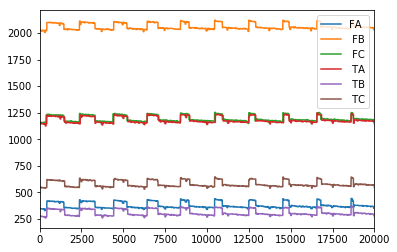

(20000, 6)

In [3]:
data_none.drop(data_none.columns[6], axis=1,inplace=True)
data_none.plot()
plt.show()
data_none.shape

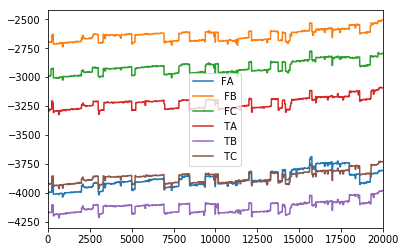

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
FA     20000 non-null float64
 FB    20000 non-null float64
 FC    20000 non-null float64
 TA    20000 non-null float64
 TB    20000 non-null float64
 TC    20000 non-null float64
dtypes: float64(6)
memory usage: 937.6 KB


In [4]:
data_z1=pd.read_csv("data_z+向上_中心受力.txt")
data_z1=pd.DataFrame(data_z1)
data_z1.drop(data_z1.columns[6], axis=1,inplace=True)
data_z1.plot()
plt.show()
data_z1.shape
data_z1.info()

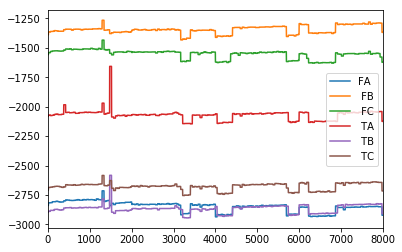

(8000, 6)

In [5]:
data_z2=pd.read_csv("data_z+向上_x+外.txt") ##舍弃
data_z2.drop(data_z2.columns[6], axis=1,inplace=True)
data_z2.plot()
plt.show()
data_z2.shape

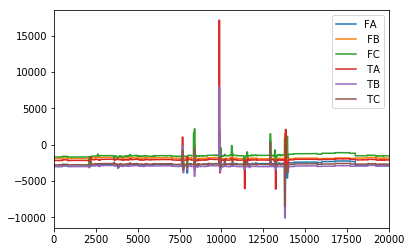

(20000, 6)

In [6]:
data_z3=pd.read_csv("data_z+向上_x-外.txt")
data_z3.drop(data_z3.columns[6], axis=1,inplace=True)
data_z3.plot()
plt.show()
data_z3.shape

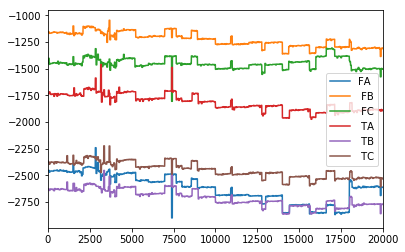

(20000, 6)

In [7]:
data_z4=pd.read_csv("data_z+向上_y正外孔受力.txt")
data_z4.drop(data_z4.columns[6], axis=1,inplace=True)
data_z4.plot()
plt.show()
data_z4.shape

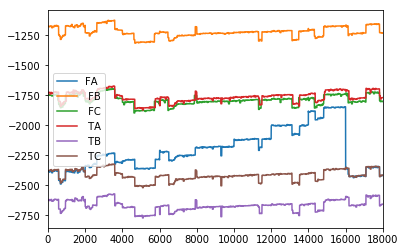

(18000, 6)

In [8]:
data_z5=pd.read_csv("data_z+向上_y-外.txt")
data_z5.drop(data_z5.columns[6], axis=1,inplace=True)
data_z5.plot()
plt.show()
data_z5.shape

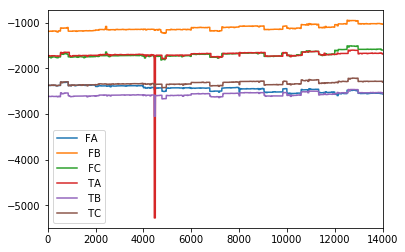

(14000, 6)

In [9]:
data_z6=pd.read_csv("data_z+向上_y+到x+30度.txt")
data_z6.drop(data_z6.columns[6], axis=1,inplace=True)
data_z6.plot()
plt.show()
data_z6.shape

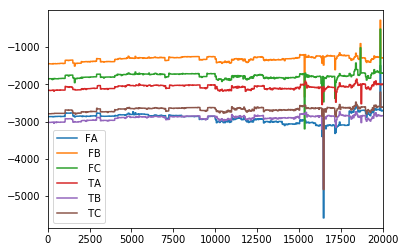

(20000, 6)

In [10]:
data_z7=pd.read_csv("data_z+向上_y+到x+60度.txt")
data_z7.drop(data_z7.columns[6], axis=1,inplace=True)
data_z7.plot()
plt.show()
data_z7.shape

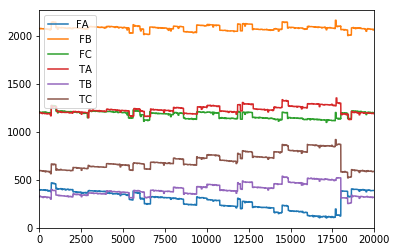

(20000, 6)

In [11]:
data_x1=pd.read_csv("data_x+向上_y+外.txt")
data_x1.drop(data_x1.columns[6], axis=1,inplace=True)
data_x1.plot()
plt.show()
data_x1.shape

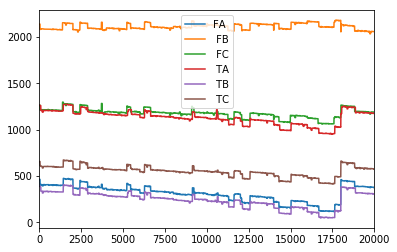

(20000, 6)

In [12]:
data_x2=pd.read_csv("data_x+向上_y-外.txt")
data_x2.drop(data_x2.columns[6], axis=1,inplace=True)
data_x2.plot()
plt.show()
data_x2.shape

### 标签生成

In [13]:
label_z1=[[0] * 6] * 20000
for i in range(0,2000):
    label_z1[i]=[0,0,0,0,0,0]
    label_z1[i+2000]=[0,0,-100,0,0,0]
    label_z1[i+4000]=[0,0,-200,0,0,0]
    label_z1[i+6000]=[0,0,-300,0,0,0]
    label_z1[i+8000]=[0,0,-400,0,0,0]
    label_z1[i+10000]=[0,0,-500,0,0,0]
    label_z1[i+12000]=[0,0,-600,0,0,0]
    label_z1[i+14000]=[0,0,-800,0,0,0]
    label_z1[i+16000]=[0,0,-1000,0,0,0]
    label_z1[i+18000]=[0,0,0,0,0,0]
label_z1=pd.DataFrame(label_z1,dtype=np.float)
label_z1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
0    20000 non-null float64
1    20000 non-null float64
2    20000 non-null float64
3    20000 non-null float64
4    20000 non-null float64
5    20000 non-null float64
dtypes: float64(6)
memory usage: 937.6 KB


## 神经网络搭建

In [14]:
import tensorflow as tf
import numpy as np

/home/skylark/anaconda2/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### 训练数据加载

### 定义节点准备接收数据

In [42]:
xs = tf.placeholder(tf.float32, [20000, 6])
ys = tf.placeholder(tf.float32, [20000, 6])

### 定义神经层：隐藏层和预测层

In [43]:
# 添加层
def add_layer(inputs, in_size, out_size, activation_function=None):
   # add one more layer and return the output of this layer
   Weights = tf.Variable(tf.random_normal([in_size, out_size]))
   biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
   Wx_plus_b = tf.matmul(inputs, Weights) + biases
   if activation_function is None:
       outputs = Wx_plus_b
   else:
       outputs = activation_function(Wx_plus_b)
   return outputs

In [44]:
# add hidden layer 输入值是 xs，在隐藏层有 10 个神经元   
l1 = add_layer(xs, 6, 10, activation_function=tf.nn.relu)
# add output layer 输入值是隐藏层 l1，在预测层输出 1 个结果
prediction = add_layer(l1, 10,6, activation_function=None)

### 定义 loss 表达式

In [45]:
# the error between prediciton and real data    
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                    reduction_indices=[1]))

### 选择 optimizer 使 loss 达到最小 

In [46]:
# 这一行定义了用什么方式去减少 loss，学习率是 0.1       
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

### 初始化

In [47]:
# important step 对所有变量进行初始化
init = tf.global_variables_initializer()
sess = tf.Session()
# 上面定义的都没有运算，直到 sess.run 才会开始运算
sess.run(init)

### 训练

In [48]:
# 迭代 1000 次学习，sess.run optimizer
for i in range(1000):
   # training train_step 和 loss 都是由 placeholder 定义的运算，所以这里要用 feed 传入参数
   sess.run(train_step, feed_dict={xs: data_z4, ys: label_z1})
   if i % 50 == 0:
       # to see the step improvement
       print(sess.run(loss, feed_dict={xs: data_z4, ys: label_z1}))

inf
102900.0
102900.0
102900.0
102900.0
102900.0
102900.0
102900.0
102900.0
102900.0
102900.0
102900.0
102900.0
102900.0
102900.0
102900.0
102900.0
102900.0
102900.0
102900.0
